Install necessary libraries and import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Data points (xi, yi)

In [2]:
X = np.array([
    [1.0, 1.5],
    [1.8, 1.2],
    [0.9, 1.6],
    [8.2, 7.3],
    [9.1, 7.2],
    [7.8, 9.5],
    [7.6, 8.0],
    [8.8, 7.5]
])

Number of components (clusters) in GMM

In [3]:
n_components = 2
n_iterations = 10

Initialize means randomly from the data points

In [4]:
np.random.seed(42)
means = X[np.random.choice(X.shape[0], n_components, replace=False)]

Initialize covariances as identity matrices

In [5]:
covariances = [np.eye(2) for _ in range(n_components)]

Initialize mixing coefficients equally

In [6]:
mixing_coefficients = np.ones(n_components) / n_components

E-step: Compute responsibilities (r_ik)

In [8]:
def e_step(X, means, covariances, mixing_coefficients):
    N = X.shape[0]  # Number of data points
    r = np.zeros((N, n_components))  # Responsibilities matrix (N x k)

    # Calculate the responsibility for each data point for each Gaussian component
    for k in range(n_components):
        # Multivariate normal distribution for component k (mean, covariance)
        r[:, k] = mixing_coefficients[k] * multivariate_normal.pdf(X, mean=means[k], cov=covariances[k])

    # Normalize the responsibilities so that they sum to 1 for each data point
    r = r / r.sum(axis=1, keepdims=True)

    return r

M-step: Update means, covariances, and mixing coefficients using responsibilities

In [9]:
def m_step(X, r):
    N, D = X.shape  # N: number of data points, D: dimensions (2D data in this case)

    # Effective number of points assigned to each component (sum of responsibilities)
    Nk = r.sum(axis=0)

    # Update the means for each component
    means = np.dot(r.T, X) / Nk[:, np.newaxis]

    # Update the covariances for each component
    covariances = []
    for k in range(n_components):
        diff = X - means[k]  # Center the data points by subtracting the mean
        cov_k = np.dot(r[:, k] * diff.T, diff) / Nk[k]  # Weighted covariance
        covariances.append(cov_k)

    # Update the mixing coefficients (weights)
    mixing_coefficients = Nk / N  # Proportion of points assigned to each component

    return means, covariances, mixing_coefficients

Function to visualize the clusters and ellipses representing the Gaussian components

In [10]:
def plot_gmm(X, means, covariances, r, iteration):
    plt.scatter(X[:, 0], X[:, 1], c=r.argmax(axis=1), s=40, cmap='viridis')  # Plot data points

    ax = plt.gca()  # Get current axes for plotting

    # Draw ellipses for each Gaussian component to visualize covariance structure
    for k in range(n_components):
        draw_ellipse(means[k], covariances[k], ax)

    plt.title(f'Iteration {iteration}')  # Add title with iteration number
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()  # Display the plot

Function to draw the ellipse representing the covariance of each Gaussian component

In [11]:
def draw_ellipse(mean, covariance, ax=None, **kwargs):
    from matplotlib.patches import Ellipse
    ax = ax or plt.gca()  # Use provided axis or current axis

    # Eigenvalue decomposition of the covariance matrix to get the width, height, and angle of ellipse
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))  # Get angle of ellipse
    width, height = 2 * np.sqrt(s)  # Get width and height based on eigenvalues

    # Draw ellipses at 1, 2, and 3 standard deviations from the mean
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(mean, nsig * width, nsig * height, angle, fill=False, edgecolor='r'))

Main EM algorithm iterations

<ipython-input-11-bae3b349c351>:12: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(mean, nsig * width, nsig * height, angle, fill=False, edgecolor='r'))


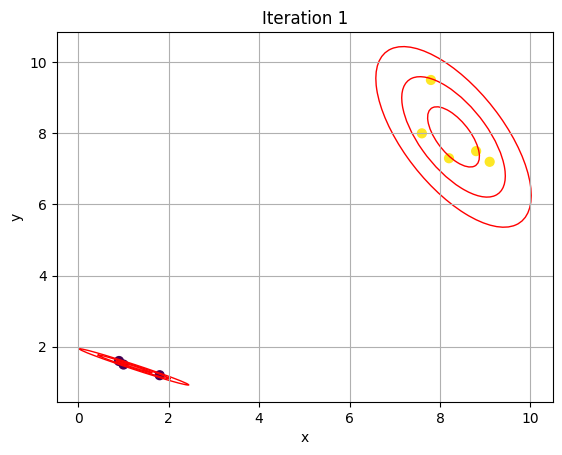

Iteration 1:
Means:
 [[1.23333333 1.43333333]
 [8.3        7.9       ]]
Covariances:
 [array([[ 0.16222222, -0.06777778],
       [-0.06777778,  0.02888889]]), array([[ 0.328, -0.314],
       [-0.314,  0.716]])]
Mixing coefficients (weights):
 [0.375 0.625]
Responsibilities (first 5 points):
 [[1.00000000e+00 1.66037293e-24]
 [1.00000000e+00 1.67273020e-23]
 [1.00000000e+00 2.08974538e-24]
 [1.29221977e-16 1.00000000e+00]
 [1.33847603e-18 1.00000000e+00]]




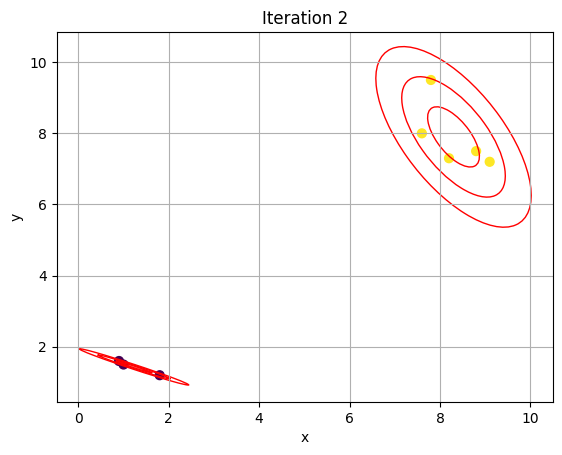

Iteration 2:
Means:
 [[1.23333333 1.43333333]
 [8.3        7.9       ]]
Covariances:
 [array([[ 0.16222222, -0.06777778],
       [-0.06777778,  0.02888889]]), array([[ 0.328, -0.314],
       [-0.314,  0.716]])]
Mixing coefficients (weights):
 [0.375 0.625]
Responsibilities (first 5 points):
 [[1.00000000e+000 1.23478882e-130]
 [1.00000000e+000 6.42246905e-117]
 [1.00000000e+000 1.50708373e-131]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]]




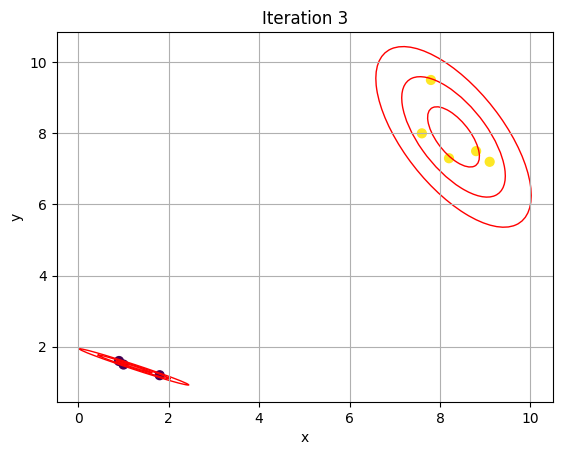

Iteration 3:
Means:
 [[1.23333333 1.43333333]
 [8.3        7.9       ]]
Covariances:
 [array([[ 0.16222222, -0.06777778],
       [-0.06777778,  0.02888889]]), array([[ 0.328, -0.314],
       [-0.314,  0.716]])]
Mixing coefficients (weights):
 [0.375 0.625]
Responsibilities (first 5 points):
 [[1.00000000e+000 1.23478882e-130]
 [1.00000000e+000 6.42246905e-117]
 [1.00000000e+000 1.50708373e-131]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]]




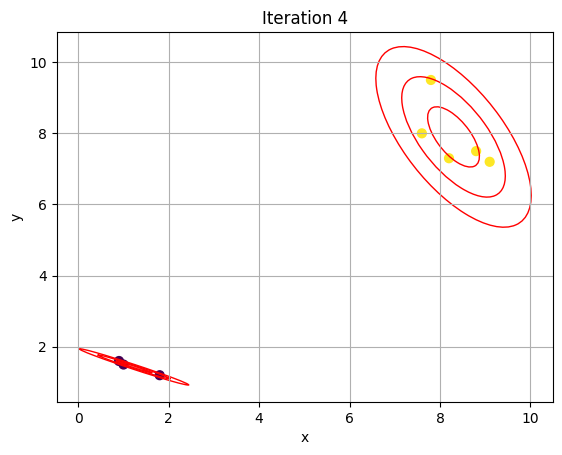

Iteration 4:
Means:
 [[1.23333333 1.43333333]
 [8.3        7.9       ]]
Covariances:
 [array([[ 0.16222222, -0.06777778],
       [-0.06777778,  0.02888889]]), array([[ 0.328, -0.314],
       [-0.314,  0.716]])]
Mixing coefficients (weights):
 [0.375 0.625]
Responsibilities (first 5 points):
 [[1.00000000e+000 1.23478882e-130]
 [1.00000000e+000 6.42246905e-117]
 [1.00000000e+000 1.50708373e-131]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]]




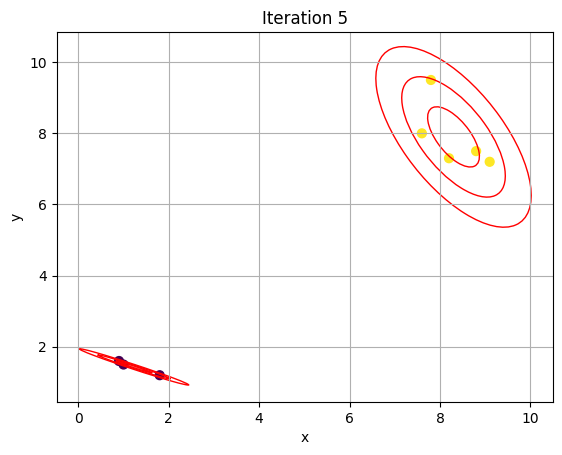

Iteration 5:
Means:
 [[1.23333333 1.43333333]
 [8.3        7.9       ]]
Covariances:
 [array([[ 0.16222222, -0.06777778],
       [-0.06777778,  0.02888889]]), array([[ 0.328, -0.314],
       [-0.314,  0.716]])]
Mixing coefficients (weights):
 [0.375 0.625]
Responsibilities (first 5 points):
 [[1.00000000e+000 1.23478882e-130]
 [1.00000000e+000 6.42246905e-117]
 [1.00000000e+000 1.50708373e-131]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]]




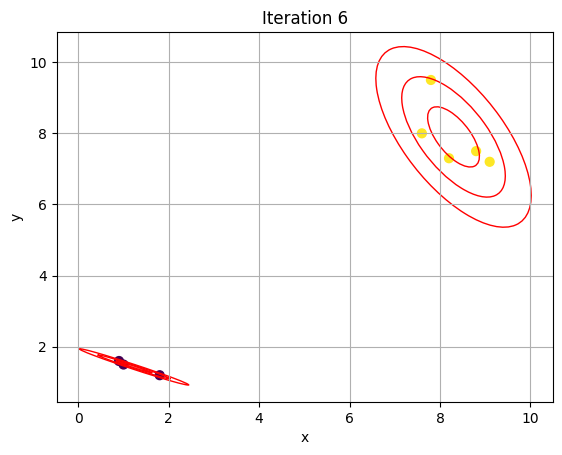

Iteration 6:
Means:
 [[1.23333333 1.43333333]
 [8.3        7.9       ]]
Covariances:
 [array([[ 0.16222222, -0.06777778],
       [-0.06777778,  0.02888889]]), array([[ 0.328, -0.314],
       [-0.314,  0.716]])]
Mixing coefficients (weights):
 [0.375 0.625]
Responsibilities (first 5 points):
 [[1.00000000e+000 1.23478882e-130]
 [1.00000000e+000 6.42246905e-117]
 [1.00000000e+000 1.50708373e-131]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]]




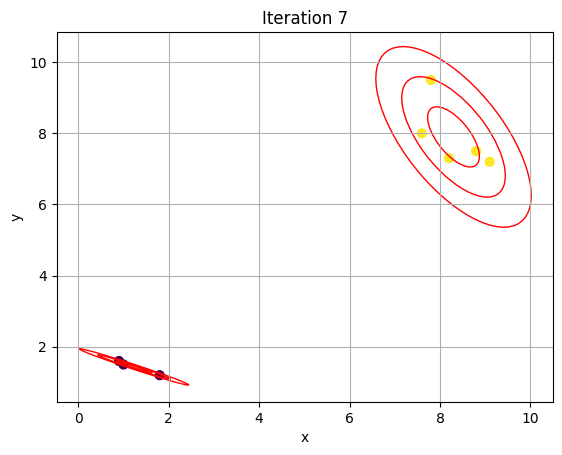

Iteration 7:
Means:
 [[1.23333333 1.43333333]
 [8.3        7.9       ]]
Covariances:
 [array([[ 0.16222222, -0.06777778],
       [-0.06777778,  0.02888889]]), array([[ 0.328, -0.314],
       [-0.314,  0.716]])]
Mixing coefficients (weights):
 [0.375 0.625]
Responsibilities (first 5 points):
 [[1.00000000e+000 1.23478882e-130]
 [1.00000000e+000 6.42246905e-117]
 [1.00000000e+000 1.50708373e-131]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]]




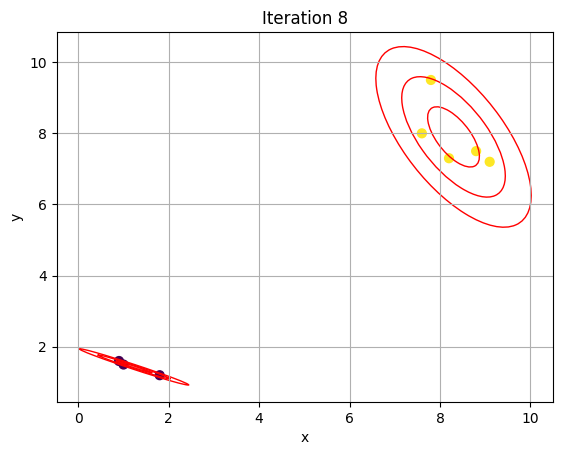

Iteration 8:
Means:
 [[1.23333333 1.43333333]
 [8.3        7.9       ]]
Covariances:
 [array([[ 0.16222222, -0.06777778],
       [-0.06777778,  0.02888889]]), array([[ 0.328, -0.314],
       [-0.314,  0.716]])]
Mixing coefficients (weights):
 [0.375 0.625]
Responsibilities (first 5 points):
 [[1.00000000e+000 1.23478882e-130]
 [1.00000000e+000 6.42246905e-117]
 [1.00000000e+000 1.50708373e-131]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]]




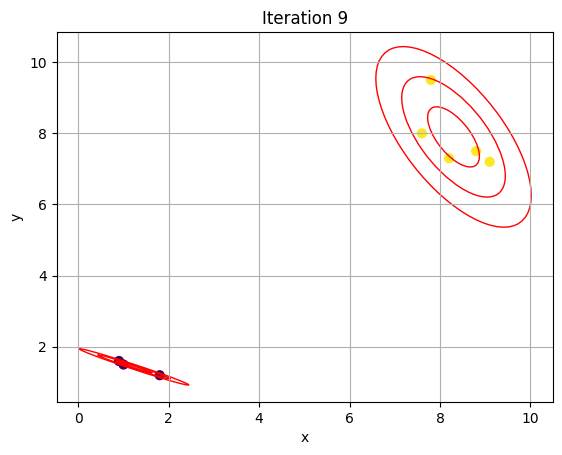

Iteration 9:
Means:
 [[1.23333333 1.43333333]
 [8.3        7.9       ]]
Covariances:
 [array([[ 0.16222222, -0.06777778],
       [-0.06777778,  0.02888889]]), array([[ 0.328, -0.314],
       [-0.314,  0.716]])]
Mixing coefficients (weights):
 [0.375 0.625]
Responsibilities (first 5 points):
 [[1.00000000e+000 1.23478882e-130]
 [1.00000000e+000 6.42246905e-117]
 [1.00000000e+000 1.50708373e-131]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]]




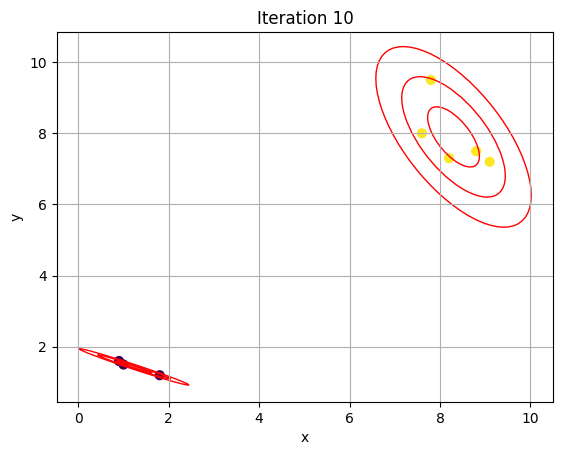

Iteration 10:
Means:
 [[1.23333333 1.43333333]
 [8.3        7.9       ]]
Covariances:
 [array([[ 0.16222222, -0.06777778],
       [-0.06777778,  0.02888889]]), array([[ 0.328, -0.314],
       [-0.314,  0.716]])]
Mixing coefficients (weights):
 [0.375 0.625]
Responsibilities (first 5 points):
 [[1.00000000e+000 1.23478882e-130]
 [1.00000000e+000 6.42246905e-117]
 [1.00000000e+000 1.50708373e-131]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]]




In [12]:
for i in range(1, n_iterations + 1):
    # Step 4: E-step to calculate responsibilities
    r = e_step(X, means, covariances, mixing_coefficients)

    # Step 5: M-step to update means, covariances, and mixing coefficients
    means, covariances, mixing_coefficients = m_step(X, r)

    # Plot the GMM after each iteration
    plot_gmm(X, means, covariances, r, i)

    # Print the parameters after each iteration
    print(f"Iteration {i}:")
    print("Means:\n", means)
    print("Covariances:\n", covariances)
    print("Mixing coefficients (weights):\n", mixing_coefficients)
    print("Responsibilities (first 5 points):\n", r[:5])
    print("\n")

Final GMM parameters after 10 iterations

In [13]:
print("Final GMM Parameters:")
print("Means:\n", means)
print("Covariances:\n", covariances)
print("Mixing coefficients (weights):\n", mixing_coefficients)

Final GMM Parameters:
Means:
 [[1.23333333 1.43333333]
 [8.3        7.9       ]]
Covariances:
 [array([[ 0.16222222, -0.06777778],
       [-0.06777778,  0.02888889]]), array([[ 0.328, -0.314],
       [-0.314,  0.716]])]
Mixing coefficients (weights):
 [0.375 0.625]
